# K-Means clustering

K-Means clustering is a method that aims to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest cluster centroid. 

Algorithm: 
- Input number of clusters, randomly initialize centers
- Assign all points to the closest cluster center
- Change cluster centers to be in the middle of its points
- Repeat until convergence

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles

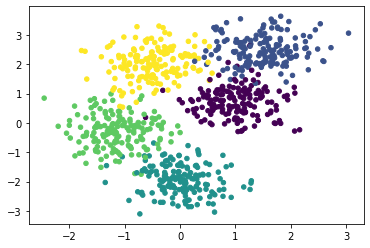

In [2]:
n_samples = 800  
n_clusters = 5
cluster_std = 0.5

centers = [
    [1, 0.7],
    [1.5, 2.5],
    [0, -2],
    [-1.2, -0.3],
    [-0.5,2]
]

X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20);

`Scikit-learn` has built-in methods for K-Menas clustering.

In [3]:
from sklearn import cluster

In [4]:
kmeans = cluster.KMeans(n_clusters=5,random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [5]:
kmeans

KMeans(n_clusters=5, random_state=0)

In [6]:
kmeans.cluster_centers_

array([[ 0.01897652, -1.94435693],
       [ 1.50588271,  2.50133393],
       [ 1.01413594,  0.70290614],
       [-0.47457459,  2.04766036],
       [-1.11706497, -0.26923434]])

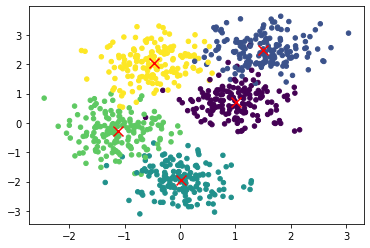

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=20);
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],  c='red', marker='x', s=100)

## k-Means for Color Compression

One interesting application of clustering is in color compression within images. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and many of the pixels in the image will have
similar or even identical colors. We can use the k-Means clustering for color compression.

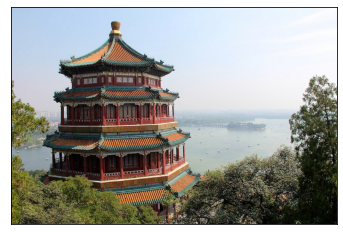

In [8]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

The image itself is stored in a three-dimensional array of size (height, width, RGB), containing red/blue/green contributions as integers from 0 to 255. 

In [9]:
china.shape

(427, 640, 3)

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space. We will reshape the data to `[n_samples, n_features]` and rescale the colors so that they lie between 0 and 1. 

In [10]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(-1, 3)
data.shape

(273280, 3)

Now let’s reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space. Because we are dealing with a very large dataset, we will use the mini-batch k-means, which operates on subsets of the data to compute the result much more quickly than the standard k-means algorithm:

In [11]:
kmeans = cluster.KMeans(n_clusters=16)
kmeans.fit(data)

KMeans(n_clusters=16)

In [12]:
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

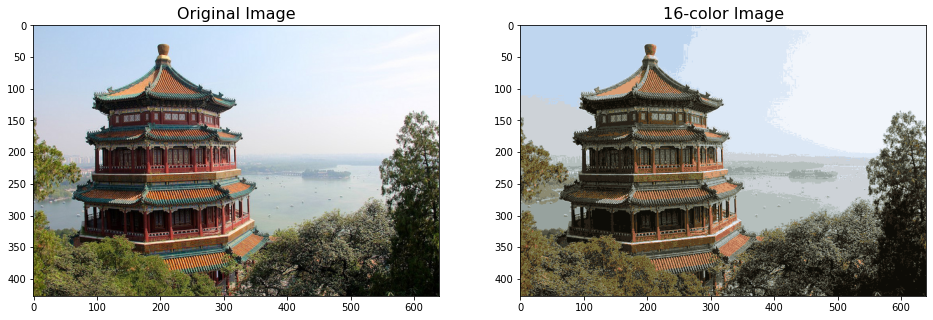

In [13]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

Some detail is certainly lost in the rightmost panel, but the overall image is still easily recognizable.